# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [1]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [2]:
n = 50 # number of examples

xs = [random.random() for _ in xrange(n)] # features
ys = map(g, xs) # targets

ts = map(f, xs) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

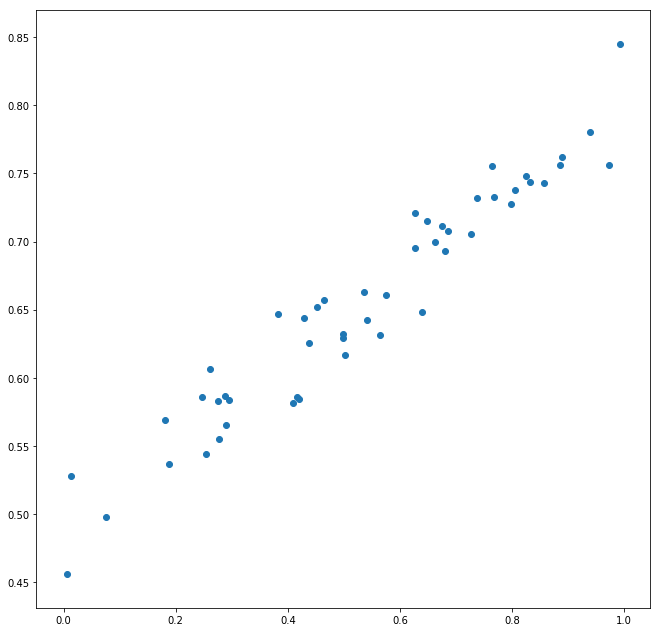

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [20]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    return sum([(y - p)**2 for y, p in zip(ys, ps)])/len(ys)

Please take a while to (roughly) guess the output before executing the cell below.

In [21]:
l2_loss(ys, ts)

0.000527768964715096

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [23]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

for i in xrange(n_epochs):
    a = a - lr * -2 * sum([(y - (a * x + b)) * x for x, y in zip(xs, ys)]) / len(xs)
    b = b - lr * -2 * sum([y - (a * x + b) for x, y in zip(xs, ys)]) / len(xs)
    
    loss = evaluate(a, b)
    losses.append(loss)
    
    print 'Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b)

Iter:   0 Loss: 0.00070015 a:  0.37138, b:  0.45622
Iter:   1 Loss: 0.00067360 a:  0.36768, b:  0.45821
Iter:   2 Loss: 0.00065033 a:  0.36421, b:  0.46007
Iter:   3 Loss: 0.00062994 a:  0.36097, b:  0.46181
Iter:   4 Loss: 0.00061208 a:  0.35793, b:  0.46343
Iter:   5 Loss: 0.00059644 a:  0.35508, b:  0.46496
Iter:   6 Loss: 0.00058273 a:  0.35242, b:  0.46638
Iter:   7 Loss: 0.00057072 a:  0.34993, b:  0.46772
Iter:   8 Loss: 0.00056019 a:  0.34760, b:  0.46897
Iter:   9 Loss: 0.00055097 a:  0.34542, b:  0.47014
Iter:  10 Loss: 0.00054289 a:  0.34338, b:  0.47124
Iter:  11 Loss: 0.00053582 a:  0.34146, b:  0.47226
Iter:  12 Loss: 0.00052962 a:  0.33967, b:  0.47322
Iter:  13 Loss: 0.00052418 a:  0.33800, b:  0.47412
Iter:  14 Loss: 0.00051942 a:  0.33643, b:  0.47496
Iter:  15 Loss: 0.00051525 a:  0.33496, b:  0.47575
Iter:  16 Loss: 0.00051160 a:  0.33359, b:  0.47648
Iter:  17 Loss: 0.00050840 a:  0.33230, b:  0.47717
Iter:  18 Loss: 0.00050559 a:  0.33110, b:  0.47782
Iter:  19 Lo

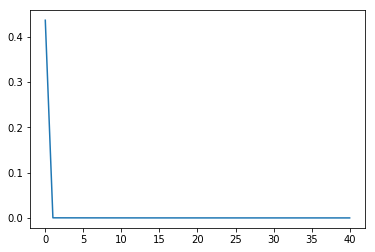

In [24]:
plt.plot(losses)

Let's now visually asses how we do on training data

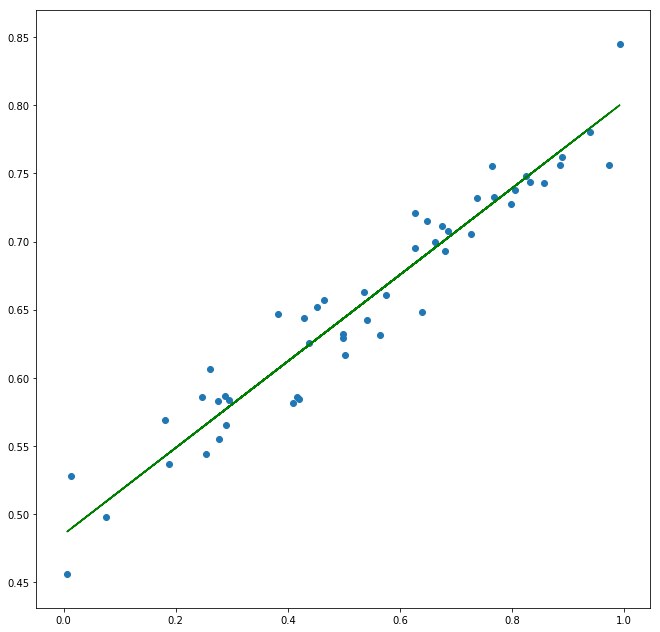

In [25]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

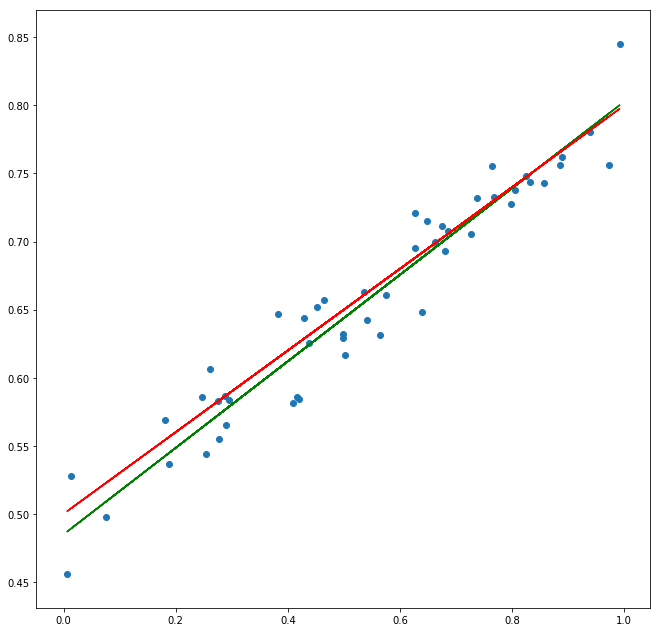

In [27]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.plot(xs, map(f, xs), c='r')

################################################################
# TODO: Add the (unobserved) ground truth, i.e. ts to the plot #
################################################################

plt.show()

Let's check our implementation vs. the one in sklearn

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print 'Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(
    sk_loss, sk_a, sk_b)

Loss: 0.00048576 a:  0.31349, b:  0.48726
